In [1]:
# imports
import os
import matplotlib.pyplot as plt
import helpers as h # contains the computations
import numpy as np
import pandas as pd
import json

# read in the files from data directory

left_file_path = "data/suspended_moon_walk/3/suspended-3kmh_Left-Ankle.csv"
right_file_path = "data/suspended_moon_walk/3/suspended-3kmh_Right-Ankle.csv"

# reads the csv into a pandas data frame
left_data = pd.read_csv(left_file_path)
right_data = pd.read_csv(right_file_path)

# view the data frame 
left_data.head(5)

,PacketCounter,SampleTimeFine,Quat_W,Quat_X,Quat_Y,Quat_Z,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z
0,2,1332779953,0.848510,0.096493,-0.293764,0.429445,6.739449,-1.171983,9.184886,14.667309,-51.870186,7.364054
1,3,1332796620,0.845507,0.104052,-0.298791,0.430135,6.096780,-0.107928,10.085825,24.462433,-47.328930,7.988471
2,4,1332813287,0.844366,0.112745,-0.296154,0.432005,6.823732,-0.647606,9.142454,34.266891,-41.760643,13.131383
3,5,1332829954,0.841606,0.123039,-0.294796,0.435495,8.109175,-1.093330,10.689157,56.780254,-38.718262,17.742405
4,6,1332846621,0.837858,0.134000,-0.294050,0.439970,6.872645,-0.591780,10.362171,74.279213,-37.866852,16.748127


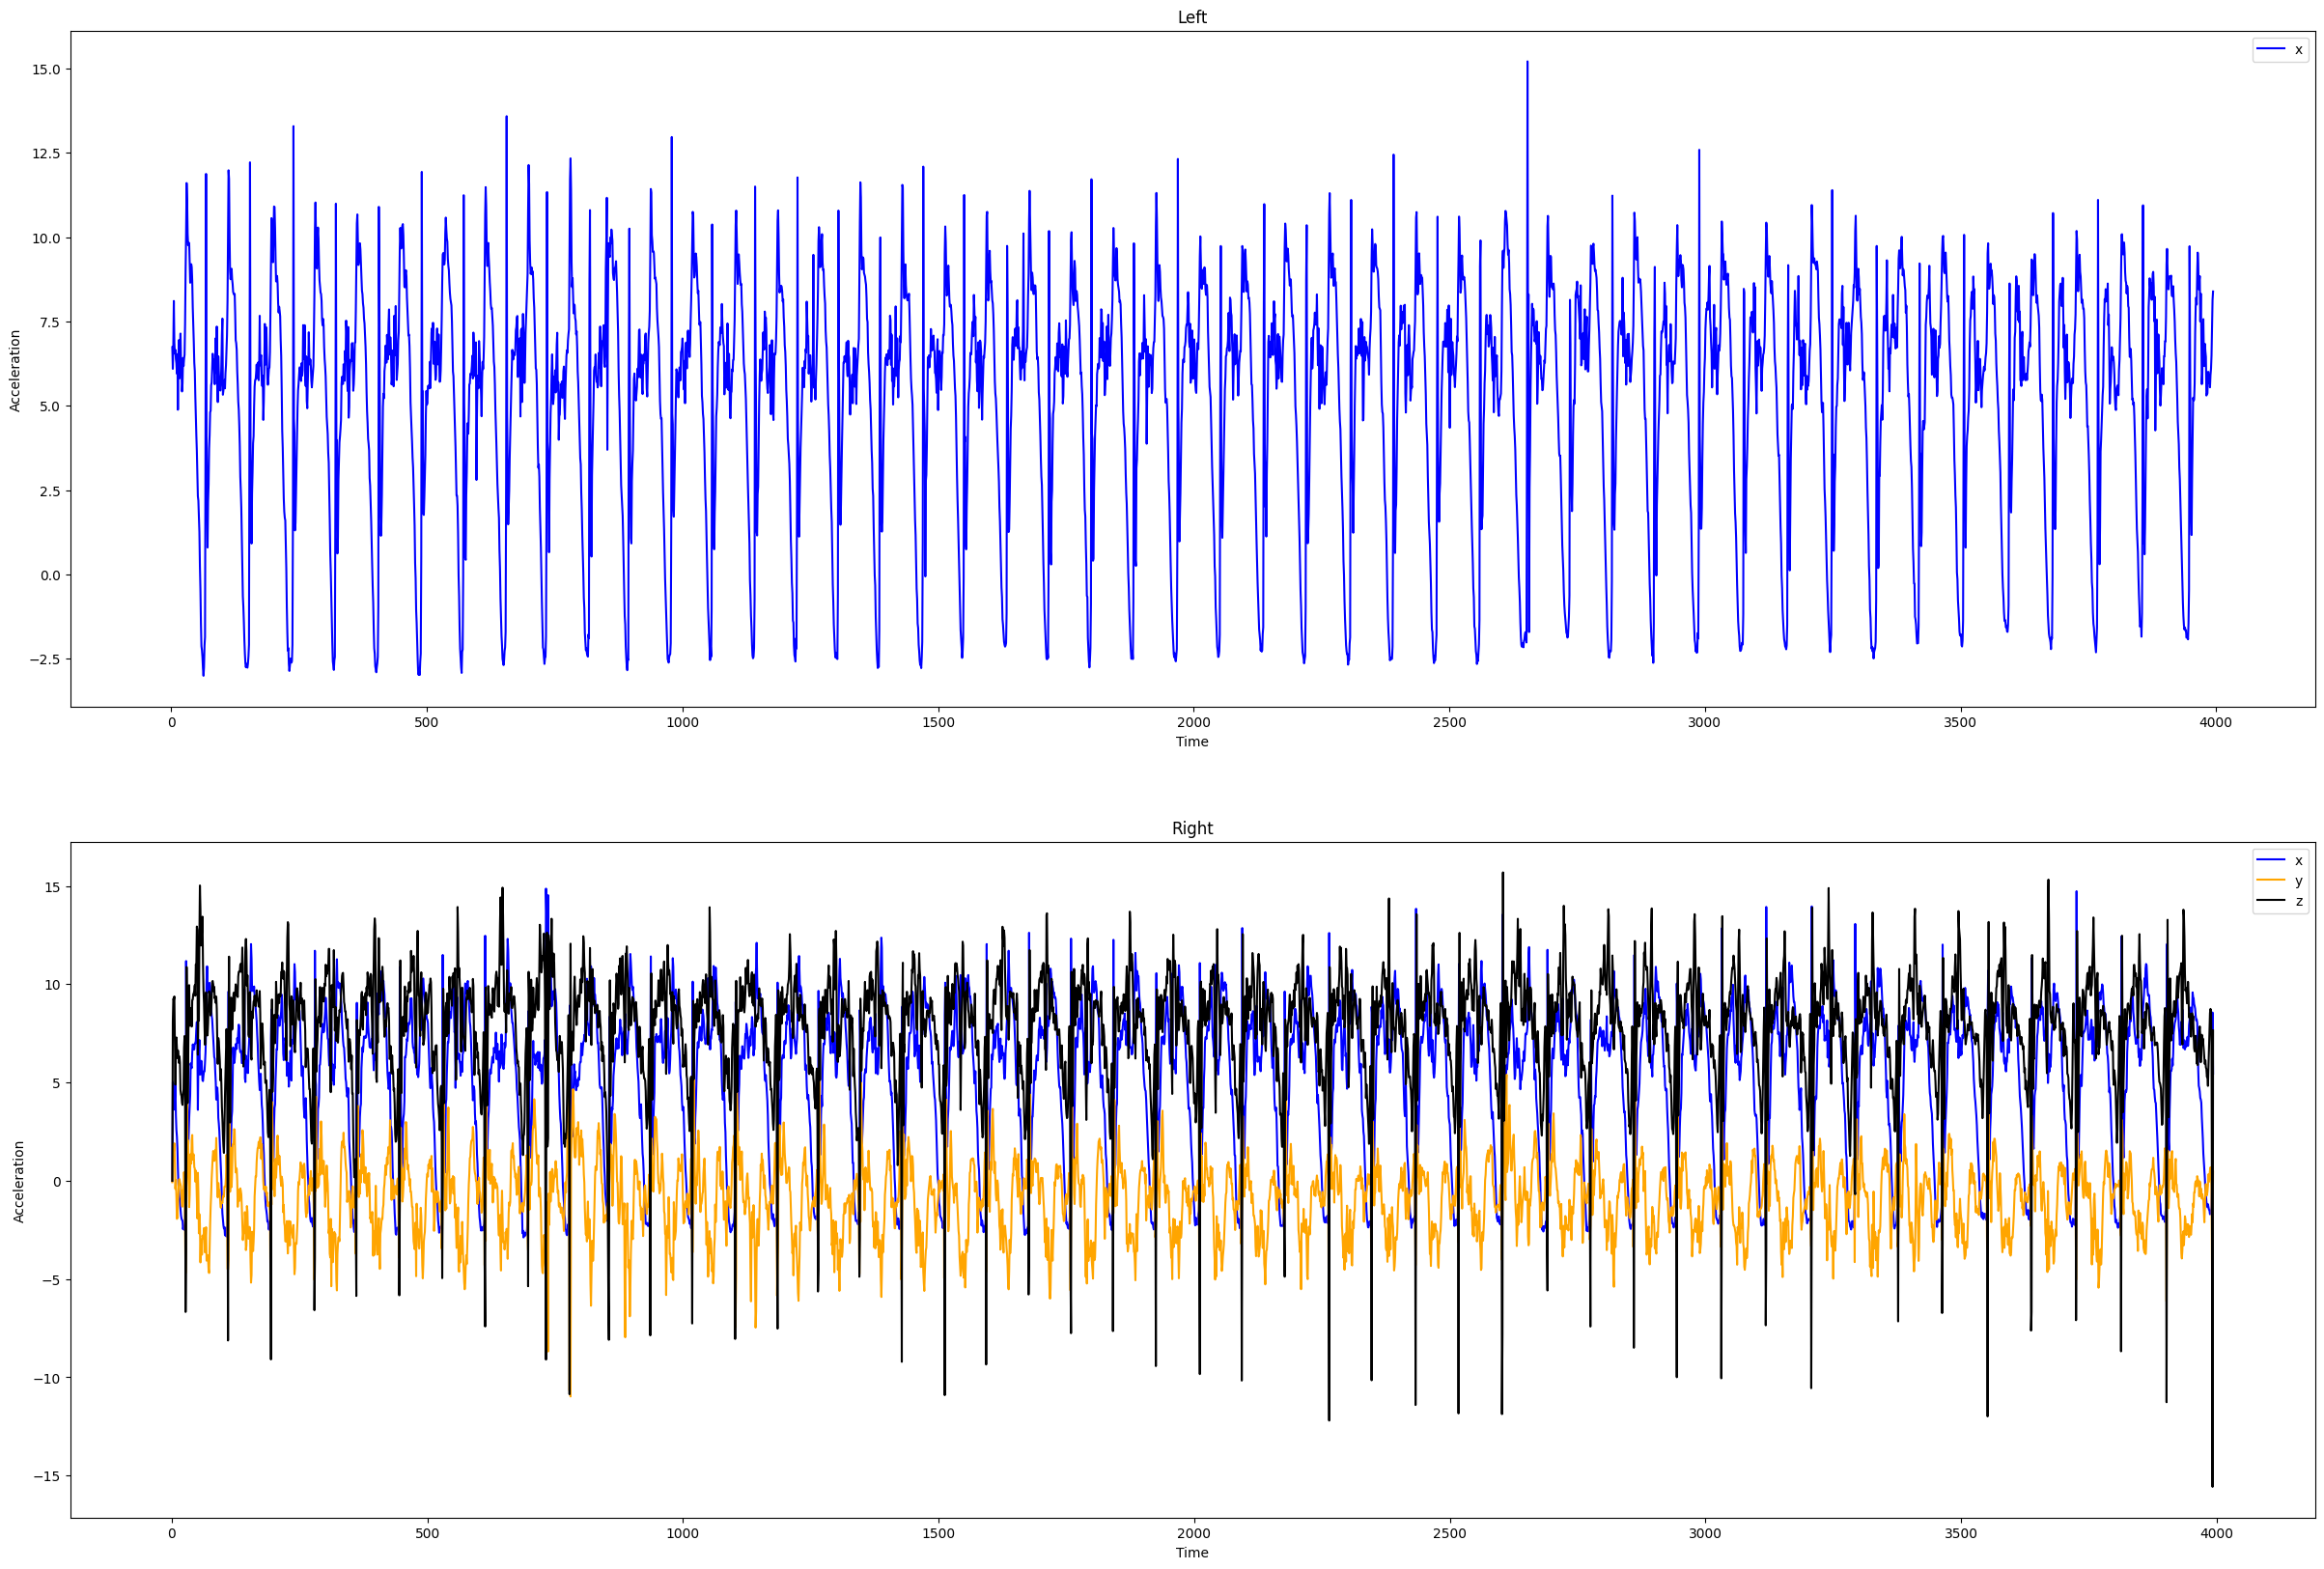

In [2]:
# explore the raw data

# horizontal - z is up, x is horizonal and y is sideways. difference is fwd / bwd of z axis

# left
l_pc =  left_data["PacketCounter"]
l_a_x = left_data["Acc_X"]
l_a_y = left_data["Acc_Y"]
l_a_z = left_data["Acc_Z"]

# right
r_pc =  right_data["PacketCounter"]
r_a_x = right_data["Acc_X"]
r_a_y = right_data["Acc_Y"]
r_a_z = right_data["Acc_Z"]

# plotting example
fig, ax = plt.subplots(2,1, figsize=(30, 20))

# Add labels, title, and legend
ax[0].plot(l_pc, l_a_x, color="blue", label="x")
#ax[0].plot(l_pc, l_a_y, color="orange", label="y")
#ax[0].plot(l_pc, l_a_z, color="black", label="z")
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Acceleration')
ax[0].set_title('Left')
ax[0].legend()

ax[1].plot(r_pc, r_a_x, color="blue", label="x")
ax[1].plot(r_pc, r_a_y, color="orange", label="y")
ax[1].plot(r_pc, r_a_z, color="black", label="z")
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Acceleration')
ax[1].set_title('Right')
ax[1].legend()


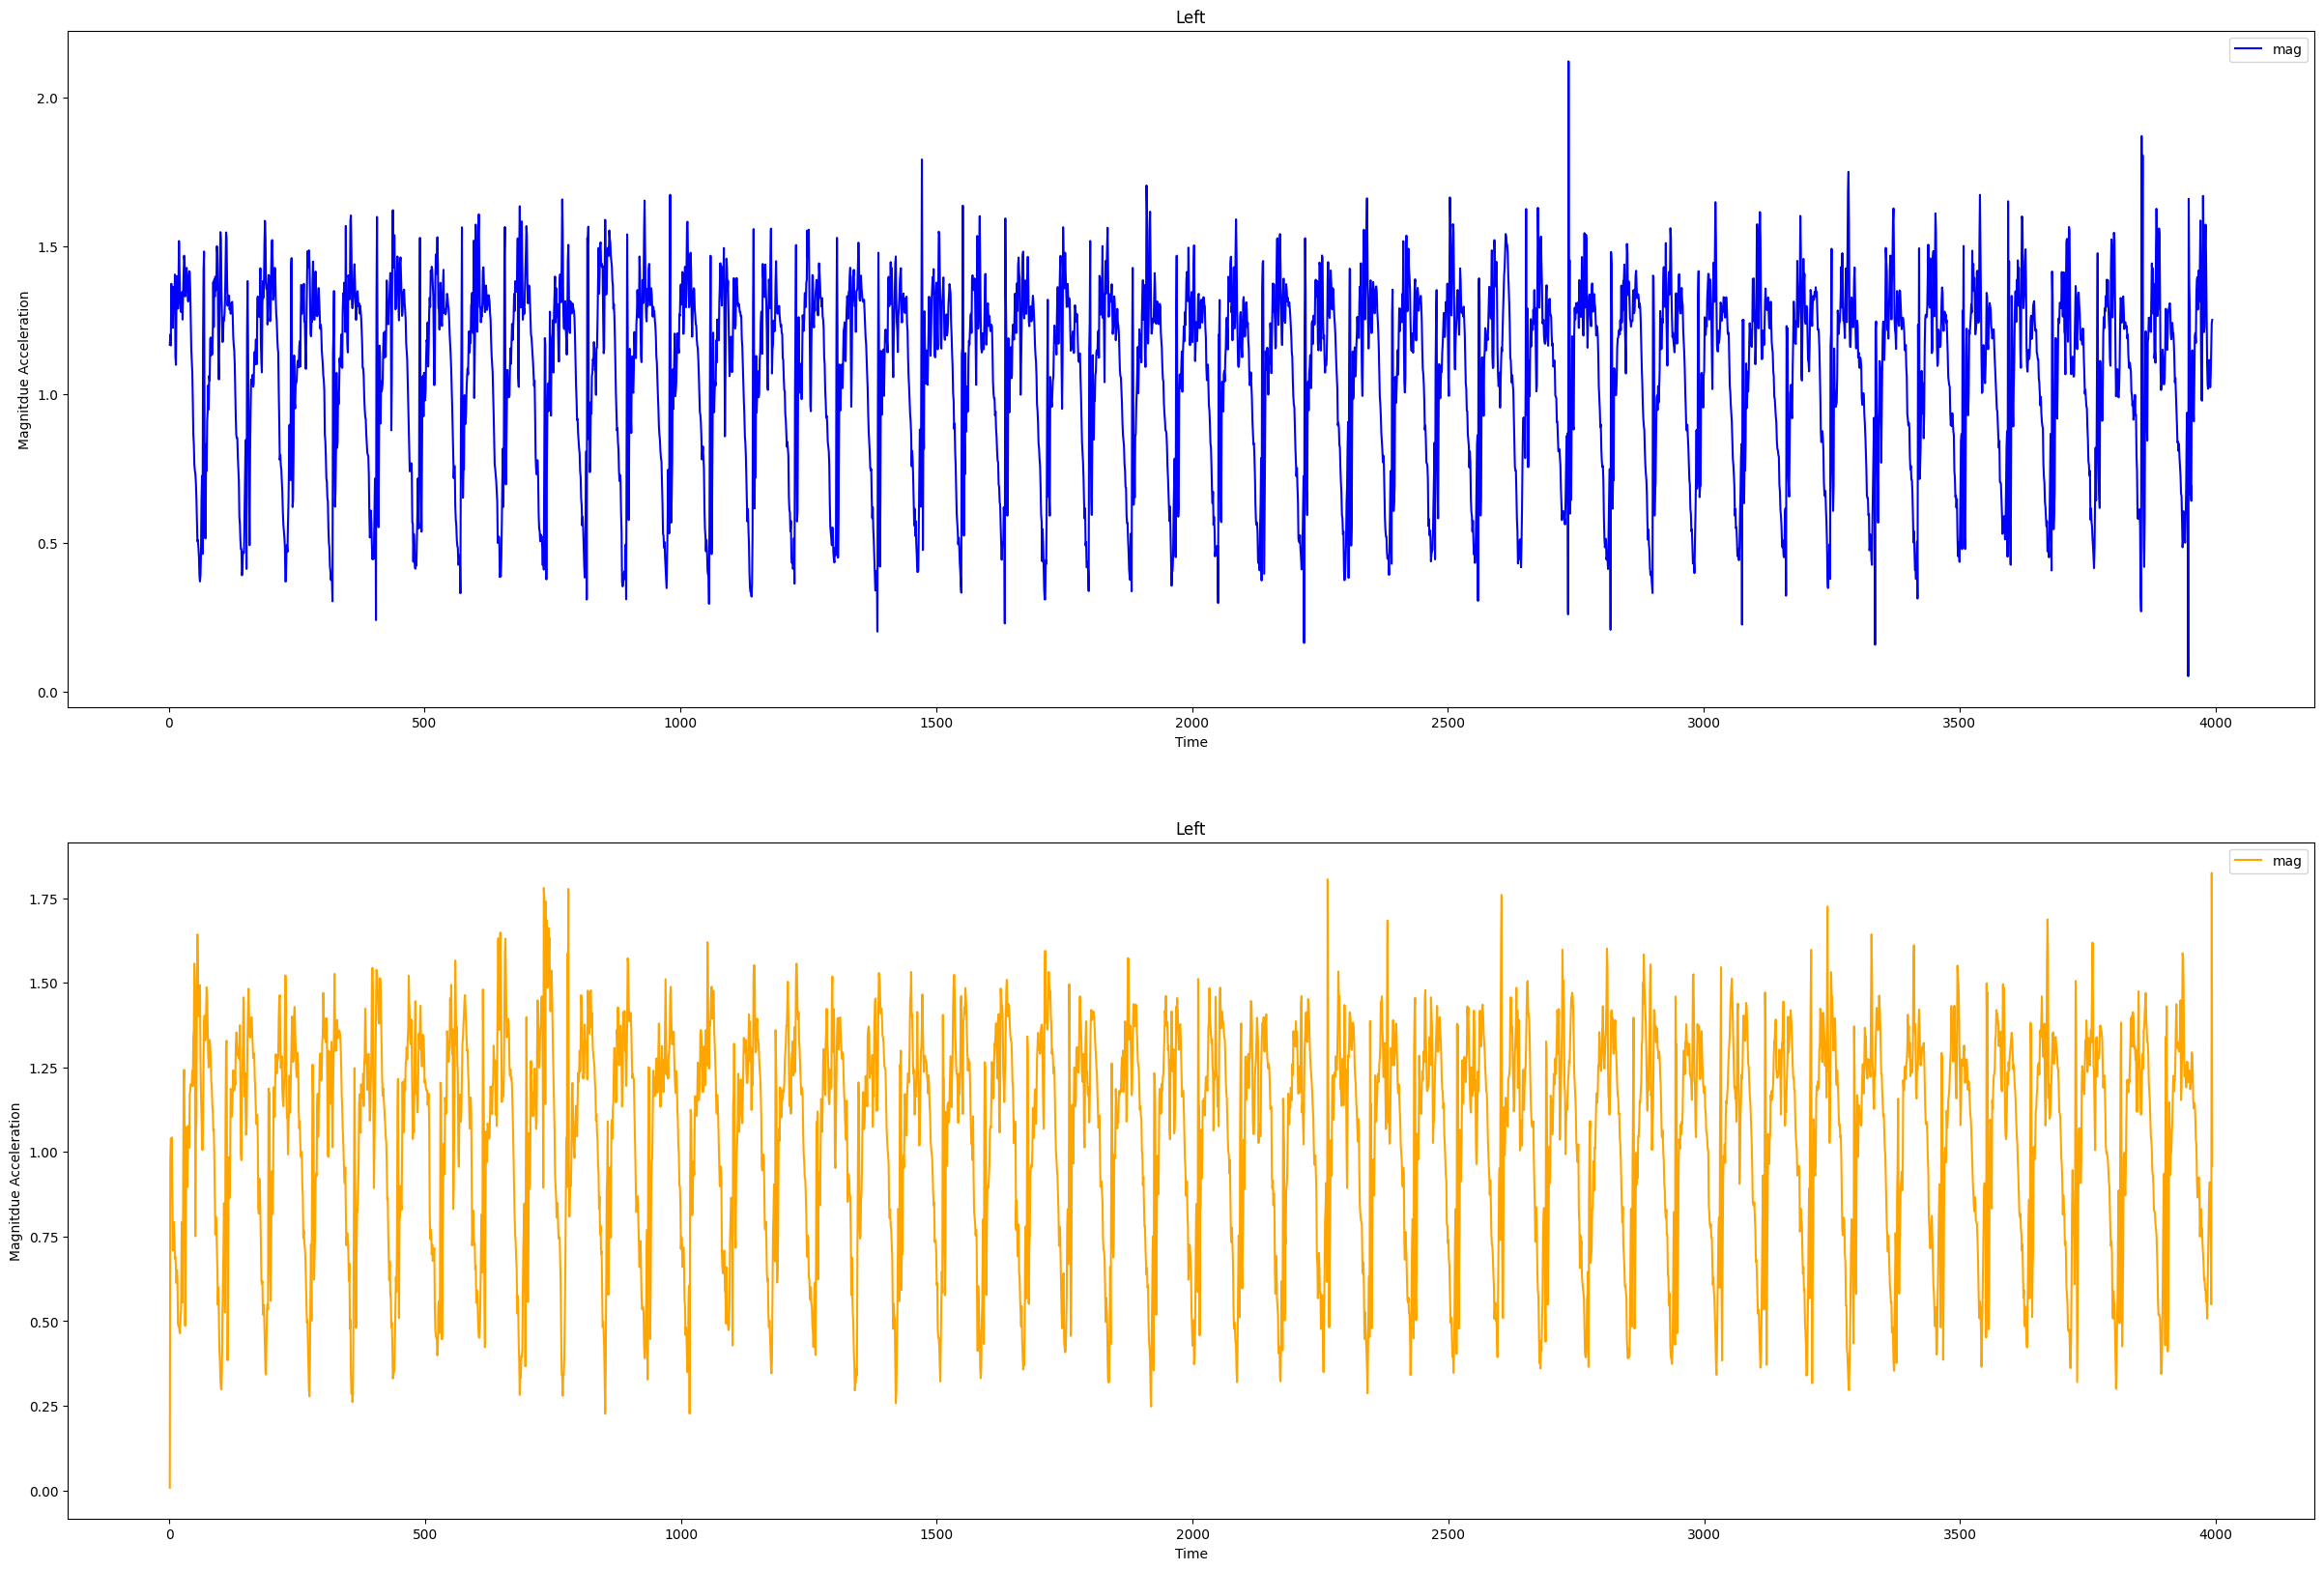

In [3]:
# normalise to BW by dividing by g
g = 9.80665
l_a_x_norm = l_a_x.to_numpy()  / g
l_a_y_norm = l_a_y.to_numpy()  / g
l_a_z_norm = l_a_z.to_numpy()  / g

r_a_x_norm = r_a_x.to_numpy()  / g
r_a_y_norm = r_a_y.to_numpy()  / g
r_a_z_norm = r_a_z.to_numpy()  / g

#  compute the magnitdue vector

# function to compute (also in helpers)
def vector_magnitude(vectors):
    n = len(vectors[0])
    assert all(len(v) == n for v in vectors), "Vectors have different lengths"
    vm = np.sqrt(sum(v ** 2 for v in vectors))
    return vm
    
l_mag = vector_magnitude([l_a_x_norm, l_a_y_norm, l_a_z_norm])
r_mag = vector_magnitude([r_a_x_norm, r_a_y_norm, r_a_z_norm])

fig, ax = plt.subplots(2,1, figsize=(30, 20))

# Add labels, title, and legend
ax[0].plot(l_pc, l_mag, color="blue", label="mag")
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Magnitdue Acceleration')
ax[0].set_title('Left')
ax[0].legend()

ax[1].plot(r_pc, r_mag, color="orange", label="mag")
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Magnitdue Acceleration')
ax[1].set_title('Left')
ax[1].legend()


In [4]:
# probably mulitple by the percentage of graity on the moon? 

In [5]:
#inputs
sampling_rate = 60
window_period = 5
window = sampling_rate * window_period
lc_off = 0.1
hc_off = 6
filter_order = 5
filter_type = "bandpass"
g_level = 9.80665

l_a_x = left_data["Acc_X"]
l_a_y = left_data["Acc_Y"]
l_a_z = left_data["Acc_Z"]

r_a_x = right_data["Acc_X"]
r_a_y = right_data["Acc_Y"]
r_a_z = right_data["Acc_Z"]

print(len(l_a_x))

3993


In [12]:
# compute the loading intensity in 5 seconds windows
g_level= 9.80665
left_li = h.compute_skeletal_loading_in_windows(l_a_x, l_a_y, l_a_z, sampling_rate, window, lc_off, hc_off, filter_order, filter_type, g_level)
right_li = h.compute_skeletal_loading_in_windows(r_a_x, r_a_y, r_a_z, sampling_rate, window, lc_off, hc_off, filter_order, filter_type, g_level)

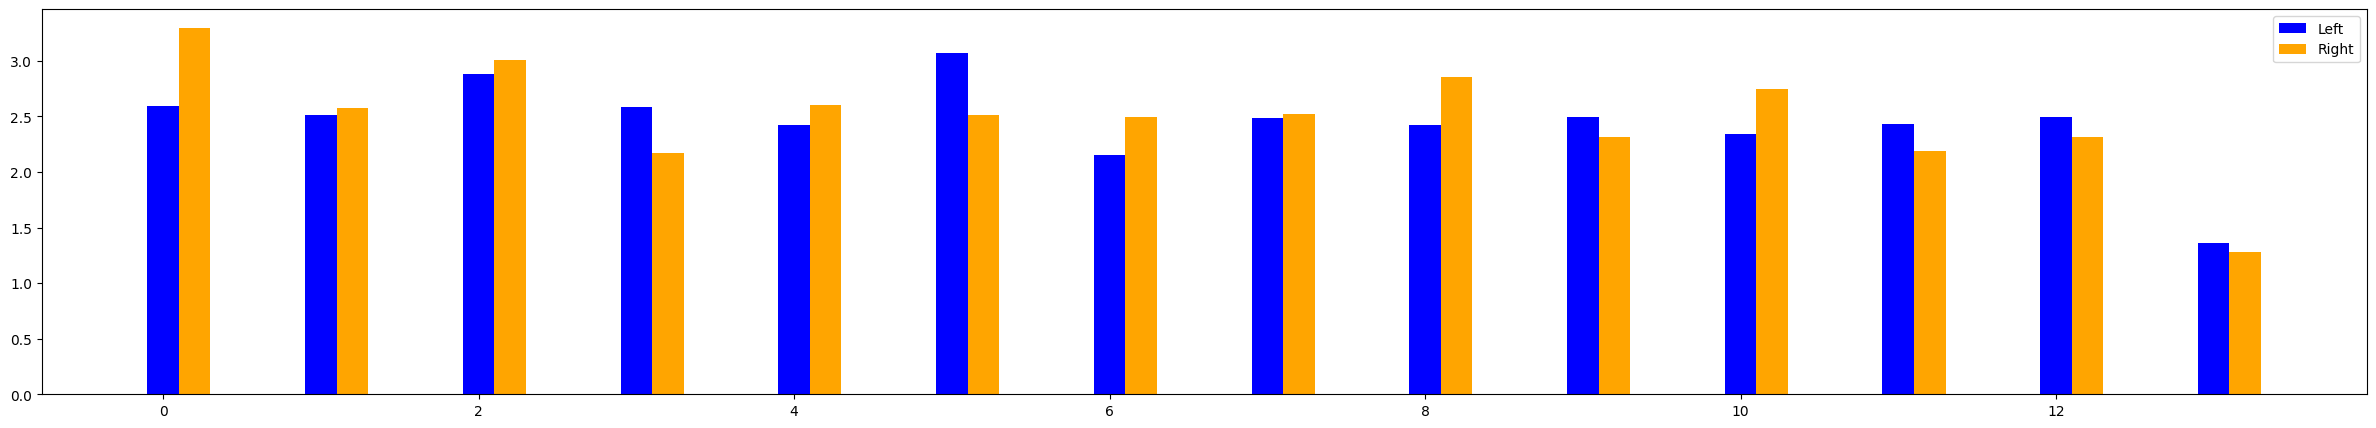

In [13]:
# plot 
fig, ax = plt.subplots(1,1, figsize=(30, 5))

# time index
l_index = [i for i in range(len(right_li))]
r_index = [i + 0.2 for i in range(len(left_li))]

ax.bar(l_index, left_li,   0.2,  color="blue", label="Left" )
ax.bar(r_index, right_li,  0.2, color="orange", label="Right" )
ax.legend()

In [10]:
# do it for "certical / horizontal" x axis
# l_a_x and r_a_x

l_x_li = h.compute_skeletal_loading_axis_in_windows(l_a_x,sampling_rate, window, lc_off, hc_off, filter_order, filter_type, g_level)
r_x_li = h.compute_skeletal_loading_axis_in_windows(r_a_x,sampling_rate, window, lc_off, hc_off, filter_order, filter_type, g_level)


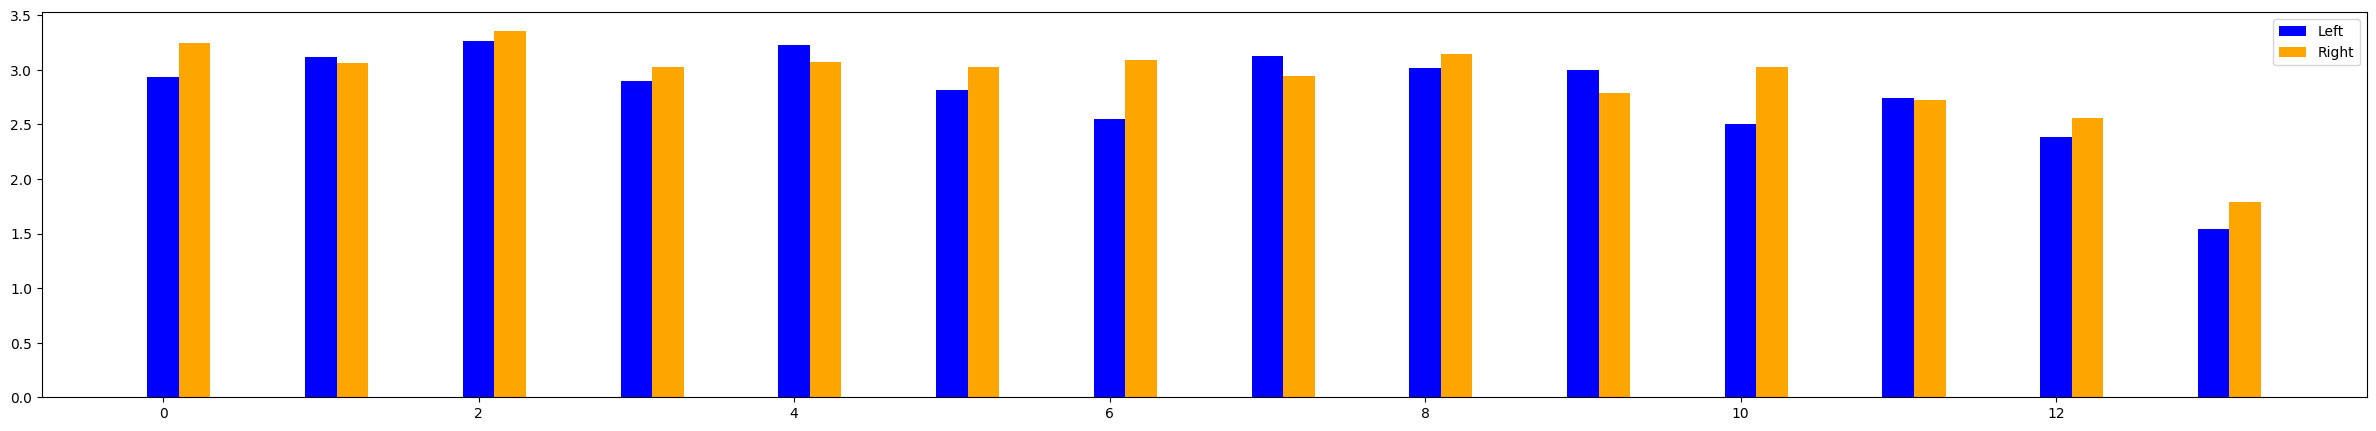

In [11]:
# plot 
fig, ax = plt.subplots(1,1, figsize=(30, 5))

# time index
l_index = [i for i in range(len(l_x_li))]
r_index = [i + 0.2 for i in range(len(r_x_li))]

ax.bar(l_index, l_x_li,   0.2,  color="blue", label="Left" )
ax.bar(r_index, r_x_li,  0.2, color="orange", label="Right" )
ax.legend()